<a href="https://colab.research.google.com/github/alexlapshov89/ALapshov_coding/blob/main/math%26ml_6_part3_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

In [101]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# подключение GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [103]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Skillfactory/MATH&ML-6 Математический анализ в контексте задачи оптимизации. Часть 3/data/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [104]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [105]:
X = data[['TV','radio','newspaper']]
X = np.array(X)
y = data.sales
y = np.array(y)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [106]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [107]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

Коэффициенты модели:  [ 41.72674971 110.04083384  73.47276856  -0.57704429]
Достигнутое значение MAE:  1.2517035729734483


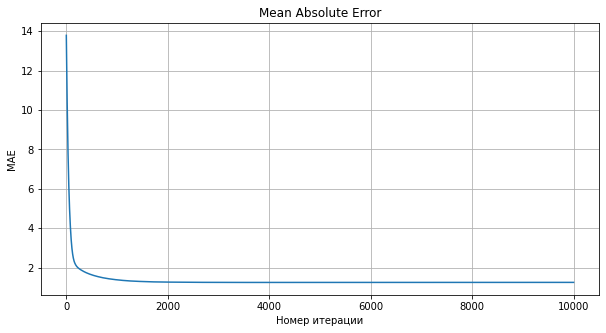

In [108]:
'''
Функция поиска коэффициентов модели методом координатного спуска
Аргументы:
X - матрица наблюдений
    (первый столбец должен быть заполнен единицами)
y - вектор целевой переменной
iterations - число итераций (по умлчанию 1000)
eta - шаг обучения (по умолчанию 1)
Результат: возвращает коэффициенты модели (w) и список значений mae (errors)
'''
def coord_d(X,y,iterations=1000,eta=1):
  N = np.shape(X)[1]      # количество предикторов
  n = np.shape(y)[0]      # длина выборки
  w = np.zeros(N)         # массив коэффициентов модели (изначально заполнен нулями)
  errors = []             # список значений ошибок (mae)
  # повторяем указанное число итераций
  for i in range(iterations):
    # корректирруем каждый коэффициент w отдельно от остальных    
    for j in range(N):
      y_pred = np.dot(X, w)                      # предсказание целевого признака
      der = np.dot (X[:,j], (y_pred - y))/ n     # средняя ошибка предсказания, вносимая j-м коэффициентом модели w
      w[j] -= eta*der                            # корректировка коэффициента
    
    y_pred = X@w                                 # предсказание целевого признака после коррекции w
    mae_error = sum(abs(y-y_pred))/len(y)        # расчет ошибки (MAE)
    errors.append(mae_error)                     # cписок значений ошибок
  return w,errors

# расчет коэффициентов модели
w,errors = coord_d(X,y,10000)
print('Коэффициенты модели: ',w)
print('Достигнутое значение MAE: ',errors[-1])
# визуализация:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(errors)
ax.set_title('Mean Absolute Error')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('MAE')
ax.grid()
plt.show()

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [109]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print('Коэффициенты модели: ',model.coef_)
y_pred = model.predict(X)
mae_error = sum(abs(y-y_pred))/len(y)
mse_error = sum((y_pred-y)**2)/len(y)
print('MAE: ',mae_error)
print('MSE: ',mse_error)

Коэффициенты модели:  [ 41.56217205 110.13144155  73.52860638  -0.55006384]
MAE:  1.2520112296870678
MSE:  2.7841263145109347


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [110]:
X = data[['TV','radio','newspaper']]
X = np.array(X)
X = (X - np.mean(X))/np.std(X)

**Добавим единичный столбец**

In [111]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [112]:
def mse_error(y,y_pred):
  mse = sum((y-y_pred)**2)/len(y)
  return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [113]:
y_pred = np.ones(len(y))
y_pred = np.mean(y)*y_pred
print('MSE для \'наивного\' предсказания: ',mse_error(y,y_pred))

MSE для 'наивного' предсказания:  27.085743749999985


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [114]:
def lin_pred(X,w):
  y_pred = X@w
  return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [115]:
def stoch_grad_step(X,y,w,train_ind,eta=1):
  y_pred = lin_pred(X[train_ind],w)
  dir = 2*X[train_ind]*(y_pred-y[train_ind])/X[train_ind].shape[0]
  w -= eta*dir 
  return w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [116]:
# функция расчета евклидового расстояния между векторами
def vectors_distance(vec1, vec2):
  if len(vec1)!=len(vec2):
    print('Ошибка! Размерности векторов не совпадают!')
  dist_sqr = 0
  for i in range(len(vec1)):
    dist_sqr += ((vec1[i] - vec2[i])**2)
  return np.sqrt(dist_sqr)


In [117]:
'''
Функция поиска коэффициентов модели методом SGD
Аргументы:
X - матрица наблюдений
    (первый столбец должен быть заполнен единицами)
y - вектор целевой переменной
w - вектор коэффициентов(начальная точка)
eta - шаг обучения (по умолчанию 0.0001)
max_iter - максимальное число итераций (по умлчанию 1000)
eps_min - минимально-допустимое евклидового расстояния
    (при достижении eps_min алгоритм прекращает работу)
Результат: возвращает коэффициенты модели (w) и список значений mse (errors)
'''
def stochastic_gradient_descent(X,y,w,eta=0.0001,max_iter=1000,eps_min=0.01):
  errors = []
  iter = 0
  eps = 10000
  w_old = w
  while(iter<max_iter or eps>eps_min):
    index = np.random.randint(X.shape[0])
    error = mse_error(lin_pred(X,w),y)
    errors.append(error)
    w_new = stoch_grad_step(X,y,w_old,train_ind=index,eta=eta)
    eps = vectors_distance(w_new,w_old)
    iter += 1
  return w_new,errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [118]:
w = np.zeros(4)
w,errors = stochastic_gradient_descent(X,y,w,eta=0.001,max_iter=1e5,eps_min=0.01)

**Постройте график зависимости ошибки от номера итерации**

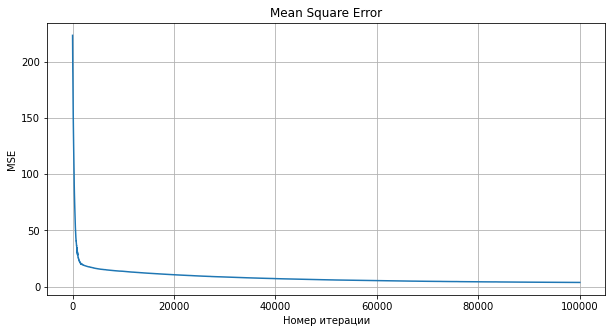

In [119]:
# визуализация:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(errors)
ax.set_title('Mean Square Error')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('MSE')
ax.grid()
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [120]:
print('Коэффициенты модели: ',w)

Коэффициенты модели:  [15.95486662  3.55071666  9.43046223  0.78737446]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [121]:
print('Достигнутое значение MSE: ',errors[-1])

Достигнутое значение MSE:  3.6304592556020445


## Выводы
1. По результатам разработки модели координатного спуска получилось совпадение результатов алгоритмов **'sklearn'** и реализации алгоритма вручную. Такой результат стал доступен при 10000 итераций.
2. Если сравнивать 2 полученные модели, то по метрике MSE выигрывает модель координатного спуска (2,78 против 3,63). Также первая модель выигрывает по числу итераций спуска на целый порядок(1е4 против 1е5). Однако вторая модель дает выигрыш в экономии вычислительных ресурсов, т.к. использует в своем алгоритме только произведение векторов (выбирается одна запись в датасете для коррекции коэффициентов), в алгоритме координатного спуска задействовано умножение матрицы на вектор. Поэтому время, которое занимает подбор коэффициентов первой и второй модели примерно одинаково (за одно и то же время вторая модель делает в 10 раз больше итераций).
3. Однозначно судить о качестве двух сравниваемых моделей сложно, т.к. данные на входе имели разную подготовку. В одном случае они нормализованы, в другом - стандартизованы.
